**Data 602 Week 8 Homework:**

In [1]:
#Importing the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [2]:
data = 'https://archive.ics.uci.edu/ml/''machine-learning-databases/wine/wine.data'

In [4]:
df = pd.read_csv(data,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
# Feature Names:
df.keys()

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [5]:
# training and testing sets.
X = df.iloc[:,1:].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=101)

In [6]:
#Standardize the feature
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [10]:
#obtaining the eigenpairs of the Wine covariance matrix
covar_mtx = np.cov(X_train_std.T)
eigen_values, eigen_vectors = np.linalg.eig(covar_mtx)
print('Eigen Values are:',eigen_values)

Eigen Values are: [4.83459841 2.66060426 1.55254081 1.05902156 0.66359406 0.56516082
 0.09716489 0.13821469 0.41734729 0.31433401 0.35146506 0.22024182
 0.23140339]


**Cumulative sum of variances and visualising it:**

In [19]:
# cumulative sum of explained variances
total = sum(eigen_values)
exp_var = [(i / total) for i in sorted(eigen_values, reverse=True)]
cum_exp_var = np.cumsum(exp_var)
cum_exp_var

array([0.36889305, 0.57190442, 0.69036752, 0.77117376, 0.8218078 ,
       0.86493111, 0.89677585, 0.92359359, 0.94757813, 0.96523484,
       0.9820399 , 0.99258605, 1.        ])

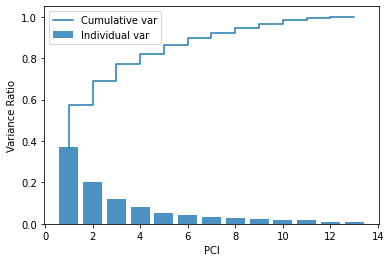

In [20]:
plt.bar(range(1,14), exp_var, alpha=0.8, label='Individual var')
plt.step(range(1,14), cum_exp_var,label='Cumulative var')
plt.ylabel('Variance Ratio')
plt.xlabel('PCI')
plt.legend()
plt.show()

According to the plot, the first principal component alone accounts for about 40% of the variance. Furthermore, the first two primary components account for roughly 60% of the variance in the sample.

**Sorting the eigenpairs by decreasing order of the eigenvalues:**

In [21]:
#Making a list of (eigenvalue,eigenvector) tuples.
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]

# Sorting the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

#print the projection matrix w
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13455071  0.455428  ]
 [ 0.22184567  0.26566143]
 [-0.04411344  0.3370113 ]
 [ 0.17728736  0.05659652]
 [-0.16756005  0.37614963]
 [-0.40402267  0.03704793]
 [-0.42698397 -0.02840585]
 [ 0.31927699  0.02647357]
 [-0.33260212  0.01902587]
 [ 0.08363508  0.50285928]
 [-0.27363098 -0.27148138]
 [-0.38933323 -0.13104517]
 [-0.28225296  0.34169622]]


In [22]:
#transforming a sample x onto the PCA subspace (the principal components 1 and 2).
X_train_std[0].dot(w)

array([-2.10674213,  1.16862558])

In [23]:
#transforming the entire 124 x 13-dimensional training dataset onto the two principal components by calculating the matrix dot product.
X_train_pca = X_train_std.dot(w)

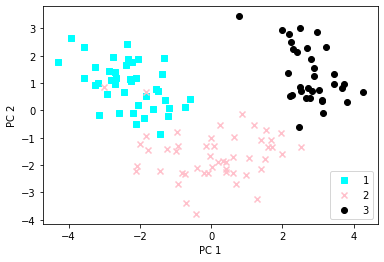

In [27]:
#visualizing the transformed Wine training set which is stored as an 124 x 2-dimensional matrix
colors = ['cyan', 'pink', 'black']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.show()

In [28]:
# intializing pca and logistic regression model
pca = PCA(n_components=2)
log_reg = LogisticRegression(multi_class='auto', solver='liblinear')

# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
log_reg.fit(X_train_pca, y_train)

LogisticRegression(solver='liblinear')

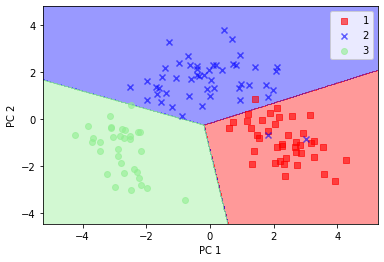

In [31]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setting up marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'pink', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plotting the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plotting class samples
    for index, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.6, c=[cmap(index)],marker=markers[index], label=cl)
        
# plot decision regions for training set
plot_decision_regions(X_train_pca, y_train, classifier=log_reg)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

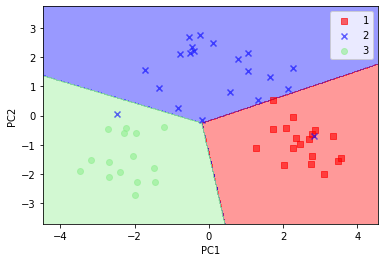

In [32]:
plot_decision_regions(X_test_pca, y_test, classifier=log_reg)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [46]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36889305, 0.20301137, 0.1184631 , 0.08080624, 0.05063404,
       0.04312331, 0.03184474, 0.02681774, 0.02398454, 0.01765671,
       0.01680505, 0.01054616, 0.00741395])